# Bode Plot Recipe

This notebook will explain the basic recipe to draw Bode Plots for Circuit Analysis. 

# Why a Bode Plot

A Bode Plot is a simple graphical representation of the transfer function of a linear time invariant system. These systems share the complex exponential function, or the family of sinusoidal functions, as their characteristic functions. Whenever an input can be represented as a sum of sinusoidal functions, the transfer function will only affect the amplitude and the phase of the input. Consequently representing the transfer function in terms of its magnitude versus frequency and its phase shift vs frequency fully describes the output of the system. The two are called Bode Magnitude Plot and Bode Phase Plot. 

Usually they are drawn with the frequency in logarithmic scale and the magnitude in units of decibel: $20 \cdot log_{10} (H(\omega))$ and the phase $\phi$ in linear scale. 

This is a useful tool because LTI systems all derive from ordinary differential equations in the time domain, which, in turn, lead to transfer functions in the frequency domain that can be expressed in terms of a fraction of two polynomials. More specific, as a fraction of the form 

$H(j \omega) = K \cdot \frac{ \prod_{i=1}^{M}j\omega - a_i}{\prod_{i=1}^{N} j\omega -b_i}$

with the system attenuation then given as

$a(j\omega) = 20 \cdot log(|H(j\omega)|) = 20 \cdot log(K) + \sum_{i=1}^{M} 20 \cdot log(j\omega-a_i) +  \sum_{i=1}^{M} 20 \cdot log(\frac{1}{ j\omega-b_i)}$

and the phase curve is 

$\phi(j\omega) = \sum_{i=1}^{M} arg(j\omega-a_i) +  \sum_{i=1}^{M} arg(\frac{1}{ j\omega-b_i)}$

We can work with these roots and zeroes because they remain after the generation of the absolute value. For example

$\big| \frac{K(-a+iw)(-b+iw)}{(-c+iw)(-d+iw)}\big|$ simplifies to 

$\frac{\sqrt{K^2}\sqrt{a^2+w^2}\sqrt{b^2+w^2}}{\sqrt{c^2+w^2}\sqrt{d^2+w^2}}$.


Consequently we can build each systems frequency response from summing the freqency responses of individual poles and zeros of the system. What we need for this are the basic plots, for single poles and zeros. 

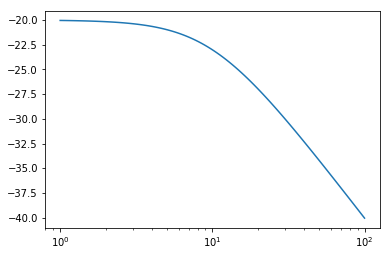

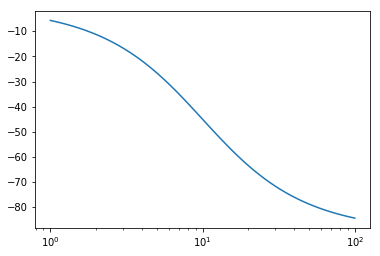

In [1]:
from scipy import signal
%matplotlib inline
import matplotlib.pyplot as plt


s1 = signal.lti(1,[1,10])   # System will have a numerator polynomial of 1 and a denominator of 1*w + 10
w, mag, phase = signal.bode(s1)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

The plot for the single pole can be derived from  $H(j\omega) = K\frac{1}{(j\omega-b)}$ at its characteristic values. We always take the logarithm of the absolute value of $H$, so for a pole: $|H(jw)| = \sqrt{H \cdot H^\ast}$. Specifically at any place where there is a zero or pole with $(jw+/-b)$ the magnitude of this term there is $\sqrt{(j\omega+/-b)(-j\omega+/-b)}= \sqrt{b^2+\omega^2}$ (for the zero, the inverse for the pole). This is important, as the root in the complex plane appears for positive or negative frequency, but the magnitude is always finite there! Taking the limit $\omega \rightarrow 0$ we arrive at $20 log(H(j\omega)) = 20 log( K \frac{1}{-b}) = 20 log(K) + 20 log(b) $. For the limit $\omega \rightarrow \infty$ we have $20 log(H(j\omega)) = 20 log(K) - 20 log(j \omega) = -\infty$.And, as seen above, at the place of the pole the magnitude is $20 log(\frac{1}{\sqrt{b^2+b^2}}) = - 20 log(\sqrt{2b^2})$ In the above case for $b = 10$ and $K = 1$ we have $- 20 \cdot 0.5 \cdot log(2 b^2) = - 10 log(2) - 20 log (b) = - 10 log (2) - 20 log (10) =-3  - 20 = -23 dB$

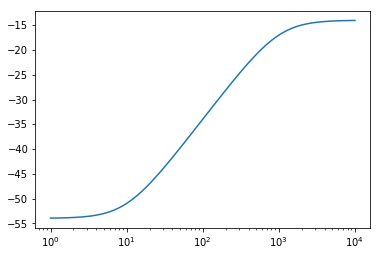

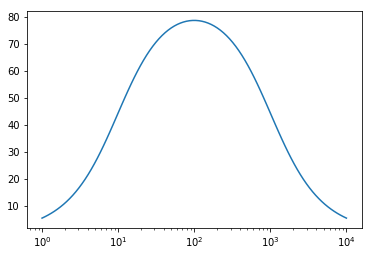

In [4]:

s1 = signal.lti([1,10],[5,5000])   # System will have a numerator polynomial of 10*w and a denominator of 1*w + 10
w, mag, phase = signal.bode(s1)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

Finding the starting values for the amplitude plot:

The initial value of the graph depends on the boundaries. The initial point is found by putting the initial angular frequency $ \omega$  into the function and finding $ |H({\mathrm  {j}}\omega )|$

For the changing of slopes we follow these rules: 

- at every value of s where $\omega =a_{n}$ (a zero), increase the slope of the line by $20,\mathrm {dB} $ per decade. Do this multiple times if the zero is present more than once.
- at every value of s where$ \omega =b_{n}$ (a pole), decrease the slope of the line by $ 20,\mathrm {dB}$ per decade. Do this multiple times if the zero is present more than once.
- The initial slope of the function at the initial value depends on the number and order of zeros and poles that are at values below the initial value, and are found using the first two rules.

For zeros and poles at zero frequency, represented as $j\omega $ or $\frac{1}{j\omega}$ we use the magnitude at $\omega = 1 rad/s$ which is equal to the DC Magnitude $K$ as $| H(j\omega)| = K \sqrt{\omega^2} $ (see above) and that is equal to K at $\omega = 1$. 

Finding the starting values for the phase plot:

- Start with a horizontal line at $\phi = 0$ if the gain is positive and at $\phi = -180$ if the gain is negative (that is an inverted sinusoid which is corresponding to a 180 degree phase shift between input and output.
- For each zero decrease the slope by 45 degrees/decade one decade before the zero and and increase the slope by 45 degrees one decade after the zero. Thus, after two decades the phase will be -90 with respect to before the zero. 
- For each pole do the inverse. 
- For a pole or zero at $\omega = 0$ we will add -/+ 90 degrees from the start (we never see zero, so the argument is not indeterminate and leads to -90 for a pole and 90 for a zero)

# The Effect of sign changes

In order to see what effect a change in sign of the frequency of the zero we get, lets plot two plots in the same picture. One with a positive frequency zero / pole and one with a negative one. 

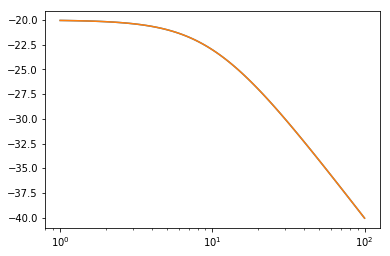

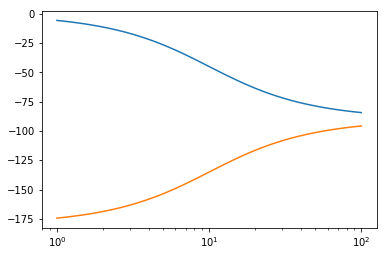

In [3]:
s1 = signal.lti(1,[1,10])   # System will have a numerator polynomial of 1 and a denominator of 1*w + 10
s2 = signal.lti(1,[1,-10])  # System will have a numerator polynomial of 1 and a denominator of 1*w - 10
w1, mag1, phase1 = signal.bode(s1)
w2, mag2, phase2 = signal.bode(s2)
plt.figure()
plt.semilogx(w1, mag1)    # Bode magnitude plot
plt.semilogx(w2,mag2)
plt.figure()
plt.semilogx(w1, phase1)  # Bode phase plot
plt.semilogx(w2, phase2)
plt.show()

In [4]:
As we can see above, the magnitude plot does not change with a change in sign. 
That is due to the fact that for the magnitude we always get squares for the frequency and the offset. 
However, in the phase plot, we need to differentiate between the minus and plus. Here we get a difference in 
sign of the slope and a phase shift of 180 degree. 

SyntaxError: invalid syntax (<ipython-input-4-038ecfebcd7a>, line 1)

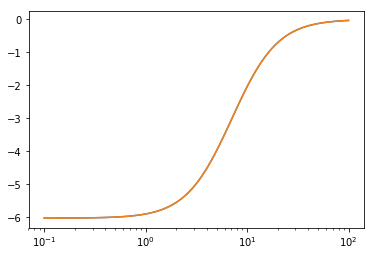

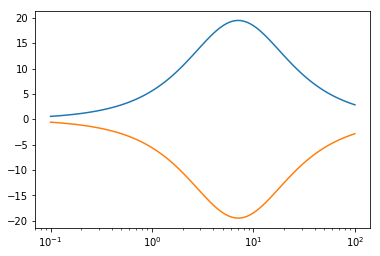

In [5]:
s1 = signal.lti([1,5],[1,10])   # System will have a numerator polynomial of 1*w +5 and a denominator of 1*w + 10
s2 = signal.lti([1,-5],[1,-10])  # System will have a numerator polynomial of 1*w -5 and a denominator of 1*w - 10
w1, mag1, phase1 = signal.bode(s1)
w2, mag2, phase2 = signal.bode(s2)
plt.figure()
plt.semilogx(w1, mag1)    # Bode magnitude plot
plt.semilogx(w2,mag2)
plt.figure()
plt.semilogx(w1, phase1)  # Bode phase plot
plt.semilogx(w2, phase2)
plt.show()

# Distinguishing left hand and right hand plane

If we look at the above sample we can find plots for negative and positive values of the pole/zero frequency . When we write 
$H(s) = \frac{10}{1000} \frac{(s/10 + 1)}{(s/1000 + 1)}$ we have the situation as below: 

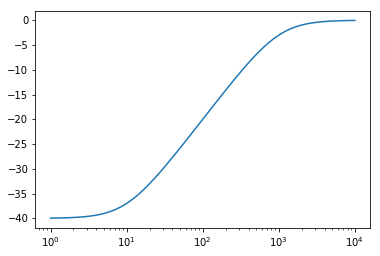

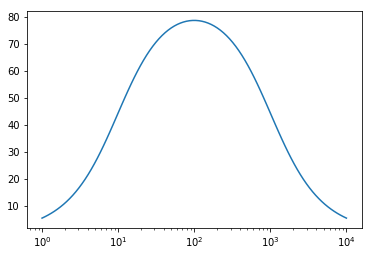

In [9]:
s1 = signal.lti([1,10],[1,1000])   # System will have a numerator polynomial of 1*w +5 and a denominator of 1*w + 10 this is a left hand plane zero and pole
#s2 = signal.lti([1,-10],[1,-1000])  # System will have a numerator polynomial of 1*w -5 and a denominator of 1*w - 10 this is a right hand plane zero and pole
w1, mag1, phase1 = signal.bode(s1)
#w2, mag2, phase2 = signal.bode(s2)
plt.figure()
plt.semilogx(w1, mag1)    # Bode magnitude plot
#plt.semilogx(w2,mag2)
plt.figure()
plt.semilogx(w1, phase1)  # Bode phase plot
#plt.semilogx(w2, phase2)
plt.show()

When we write 
$H(s) = \frac{10}{1000} \frac{(s/10 - 1)}{(s/1000 - 1)}$ we have the situation as below: 

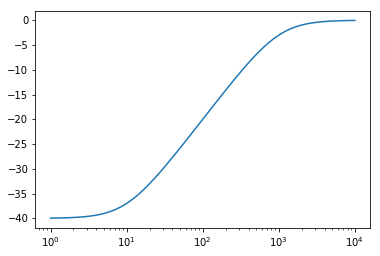

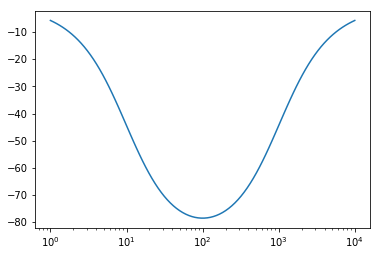

In [10]:
#s1 = signal.lti([1,10],[1,1000])   # System will have a numerator polynomial of 1*w +5 and a denominator of 1*w + 10 this is a left hand plane zero and pole
s2 = signal.lti([1,-10],[1,-1000])  # System will have a numerator polynomial of 1*w -5 and a denominator of 1*w - 10 this is a right hand plane zero and pole
#w1, mag1, phase1 = signal.bode(s1)
w2, mag2, phase2 = signal.bode(s2)
plt.figure()
#plt.semilogx(w1, mag1)    # Bode magnitude plot
plt.semilogx(w2,mag2)
plt.figure()
#plt.semilogx(w1, phase1)  # Bode phase plot
plt.semilogx(w2, phase2)
plt.show()

When we write the mixed case
$H(s) = \frac{10}{1000} \frac{(s/10 + 1)}{(s/1000 - 1)}$ we have the situation as below, where both the zero and the pole go into the same direction. 

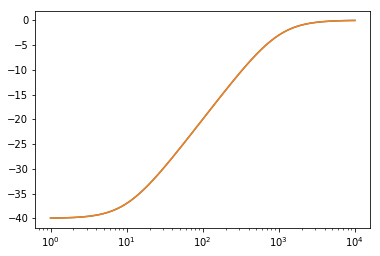

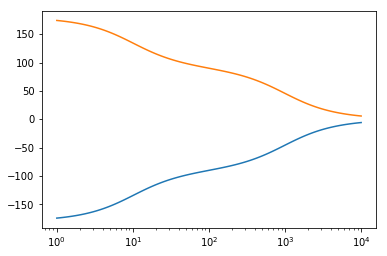

In [15]:
s1 = signal.lti([1,10],[1,-1000])   # System will have a numerator polynomial of 1*w +10 and a denominator of 1*w -1000 this is a left hand plane zero and pole
s2 = signal.lti([1,-10],[1, 1000])  # System will have a numerator polynomial of 1*w -10 and a denominator of 1*w +1000 this is a right hand plane zero and pole
w1, mag1, phase1 = signal.bode(s1)
w2, mag2, phase2 = signal.bode(s2)
plt.figure()
plt.semilogx(w1, mag1)    # Bode magnitude plot
plt.semilogx(w2,mag2)
plt.figure()
plt.semilogx(w1, phase1)  # Bode phase plot
plt.semilogx(w2, phase2)
plt.show()

# Rules for drawing asymptotic Bode Plots

1. Rearrange the tranfer function in the following format:
$H(s) = A\frac{(s/z_0 + 1)(s/z_1 + 1)\cdots(s/z_n + 1)}{(s/p_0 + 1)(s/p_1 + 1)\cdots(s/p_n + 1)}$ where $A$ is the gain of the system, $z_0$,$z_1$,...,$z_n$ are the location of the zeros and $p_0$,$p_1$,...,$p_n$ are the location of the poles. The poles and zeros can be in the left hand plane (LHP) or right hand plane (RHP). Each Pole or Zero has its frequency at $s= z$ or $s=p$. For plotting in $\omega$ we then chose $s=j\omega$. If we divide the range of values for the poles/zero between negative and positive, the LHP has the negative poles/zeros and the RHP has the positive poles/zeros.

<img src="planes.svg" width="300">

## Rules for the magnitude plot

2. The plot starts with a horizontal line at a magnitude equal to the DC magnitude of the system $H(0) = A$. This works only if there is no pole or zero at $\omega = 0$, please see below for that

<img src="magnitude.rule1.svg" width="300">

3. For every pole, the slope of the line decreases by 20 dB/decade of frequency at that pole's frequency. For the magnitude plot we do not have to distinguish between Lefthand Plane or Righthand Plane Poles or Zeros. 

<img src="magnitude.rule2.svg" width="600">

4. For every zero, the slope of the line increases by 20 dB/decade of frequency at that zero's frequency

<img src="magnitude.rule3.svg" width="600">


5. For every pole or zero at zero frequency, the plot starts with the effect of that pole/zero on the slope. Zeros and poles at zero frequency are represented as : $H(s) = A\cdot s$ (Zero) and $H(s) = A \frac{1}{s}$ (pole). This means that at frequency $1 rad/s$, the magnitude must be equal to the DC magnitude A. Then, the trace of the plot must cross A at 1 rad/s and be backtracked to the starting frequency of the plot.

<img src="magnitude.rule4.svg" width="600">

6. For multiple zeros or poles at the same frequency, the slope of the line changes according to that number

## Rules for the Phase Plot


1. Start the plot with a horizontal line at 0º phase if the gain is positive or -180º if the gain (A) is negative (negative gain corresponds to an inverted sinusoid and thus to a 180º phase between input and output)

<img src="phase.rule1.svg" width="600">

2. As the phase depends on the sign of $\frac{Im(H)}{Re(H)}$ we now have to distinguish LHP and RHP poles and zeros. For each LHP pole or RHP zero, decrease the slope by 45º/decade one decade before the pole/zero, and increase by the same amount one decade after the pole/zero. After two decades, the phase will be -90º than before for each pole/zero

<img src="phase.rule2.svg" width="600">

3. For each RHP pole or LHP zero, increase the slope by 45º/decade one decade before the pole/zero, and decrease by the same amount one decade after the pole/zero. After two decades, the phase will be +90º than before for each pole/zero.

<img src="phase.rule3.svg" width="600">

4. For each pole or zero at zero frequency, the plot starts with the effect of that pole/zero on the phase. 
   - For a pole: 
     $\angle H(s) = \angle \frac{1}{s} = \angle \frac{1}{j\omega} = \angle -\frac{j}{\omega} = \tan^{-1} -\frac{1/\omega}{0} = \tan^{-1}{-\infty} = -90º$. 
   - And for a Zero: 
     $\angle H(s) = \angle s = \angle j\omega = \tan^{-1} \frac{\omega}{0} = \tan^{-1}{\infty} = 90º$.
   Since bode plots are drawn in logarithmic scale, we never see the zero frequency. Hence, for frequencies just above zero, the ratio above for the zero is not indeterminate and leads to 90º.
   
<img src="phase.rule4.svg" width="600">

## Transferfunction Plots
You can plot transferfunctions without the approximations. The magnitude of the system is taken from the absolute value of the magnitude:

$|H(s)| = \left|A\frac{(s/z_0 + 1)(s/z_1 + 1)\cdots(s/z_n + 1)}{(s/p_0 + 1)(s/p_1 + 1)\cdots(s/p_n + 1)} \right|$
$|H(s)| = |A|\sqrt{\frac{((\omega/z_0)^2 + 1)((\omega/z_1)^2 + 1)\cdots((\omega/z_n)^2 + 1)}{((\omega/p_0)^2 + 1)((\omega/z_1)^2 + 1)\cdots((\omega/z_n)^2 + 1)}}$

These will differ from the asymptotic plots mainly around the pole and zero frequencies, where the magnitude error is 3dB.

The phase of the system is taken from the contribution of each pole and zero for the total phase.

$\angle H(s) = \angle A - \tan^{-1}(\frac{\omega}{z_0}) - \tan^{-1}(\frac{\omega}{z_1}) - \cdots - \tan^{-1}(\frac{\omega}{z_n}) + \tan^{-1}(\frac{\omega}{p_0}) + \tan^{-1}(\frac{\omega}{p_1}) + \cdots + \tan^{-1}(\frac{\omega}{p_n})$

 The phase transitions will be mainly wrong one decade before and after the pole / zero frequency. 

License:

This notebook has been compiled by Prof. Dr. Markus Pfeil at the Hochschule Ravensburg Weingarten.
The Pictures for the Plotting Rules are used from http://www.onmyphd.com/?p=bode.plot and fair usage is claimed. 

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Dieses Werk ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Namensnennung - Weitergabe unter gleichen Bedingungen 4.0 International Lizenz</a>.

